<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h1>Polynomial Linear Regression</h1>
    <h2><a href = 'https://www.linkedin.com/in/ahmedsharaf9/' style = "text-decoration: none; color: #F5EDED">Ahmed Sharaf</a></h2>
</div>   </ul>
</div>

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Create Data</h2>
</div>

Text(0, 0.5, 'Y dataset')

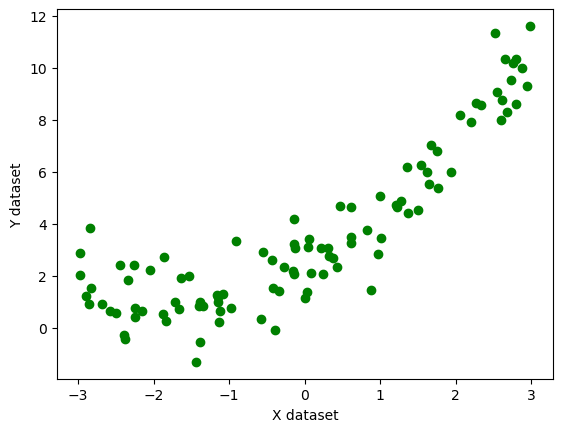

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Build Model</h2>
    <p>Note : <br>
            X -> independent features should be data frame or 2 dimesnional array <br>  
            y -> this variiable can be in series or 1d array <br>
            <br>
            Any Transformation Apply on the train data you must apply in test data
    </p>
</div>

In [3]:
# lets split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Linear Regression Using Gradient Descent

### Parameters
        fit_intercept (bool)   -> To Add Intercepr (theta 0)
        n_jobs                 -> To Select Number Of Core (-1) means all core available

### Attribures
        coef_                  -> get the slope or coefficent
        intercept_             -> get intercept
        

In [4]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression(fit_intercept=True, n_jobs=-1)
linear_regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [5]:
print("Coefficient or slope:",linear_regression.coef_)
print("Intercept:",linear_regression.intercept_)

Coefficient or slope: [[1.46686364]]
Intercept: [3.6827779]


In [6]:
## prediction of test data
y_pred = linear_regression.predict(X_test)

In [7]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'R-squared = {r2}')
print(f'Adj R-squared = {adj_r2}')

MSE = 1.9653392114626937
RMSE = 1.4019055643882343
MAE = 1.155599273366644
R-squared = 0.8150362504043411
Adj R-squared = 0.8069943482480082


Text(0, 0.5, 'Y')

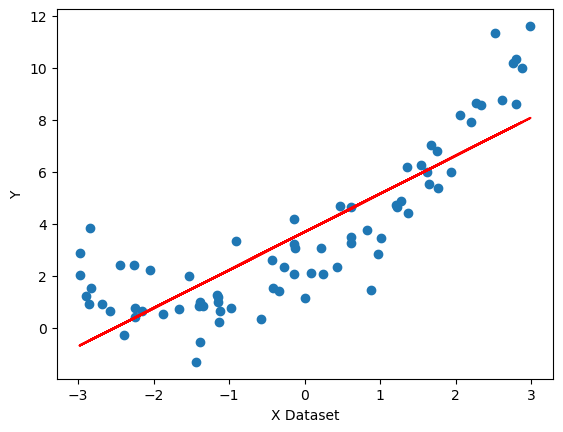

In [9]:
## Lets visualize this model
plt.plot(X_train,linear_regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")


## Polynomial Linear Regression Using Gradient Descent

In [10]:
#LEts apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression(fit_intercept=True, n_jobs=-1)
linear_regression.fit(X_train_poly, y_train)

LinearRegression(n_jobs=-1)

In [12]:
## prediction of test data
y_pred = linear_regression.predict(X_test_poly)

In [13]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')

r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f'R-squared = {r2}')
print(f'Adj R-squared = {adj_r2}')

MSE = 1.0081039290370388
RMSE = 1.0040437884061824
MAE = 0.8383865776999235
R-squared = 0.9051244275750074
Adj R-squared = 0.9009994026869643


In [14]:
linear_regression.coef_, linear_regression.intercept_

(array([[0.        , 1.53833817, 0.47556035]]), array([2.19817714]))

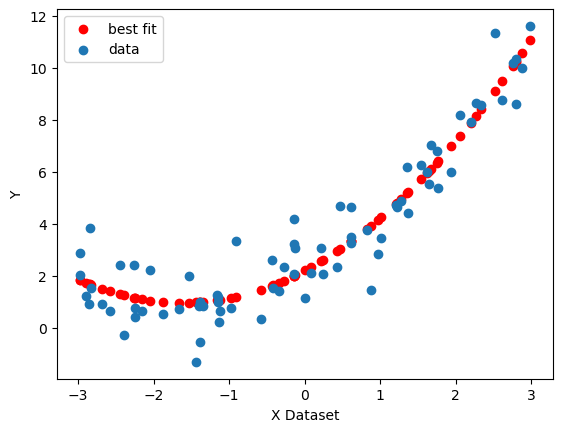

In [17]:
## Lets visualize this model
plt.scatter(X_train,linear_regression.predict(X_train_poly),color='r', label = 'best fit')
plt.scatter(X_train,y_train, label = 'data')
plt.xlabel("X Dataset")
plt.ylabel("Y")
plt.legend()


## Pipeline Concepts 

In [24]:
from sklearn.pipeline import Pipeline
def ploynomial_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_feat = PolynomialFeatures(degree = degree, include_bias=True)
    linear_regression = LinearRegression()
    poly_regression = Pipeline([
        ('poly_feat', poly_feat),
        ('linear model', linear_regression)
    ])
    poly_regression.fit(X_train, y_train)
    y_pred = poly_regression.predict(X_new)

    plt.scatter(X_train, y_train, label = 'Data Point', color = 'b')
    plt.plot(X_new, y_pred, label = f'Model with degree{degree}', color = 'r')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis([-4,4, 0, 10])
    plt.show()
    

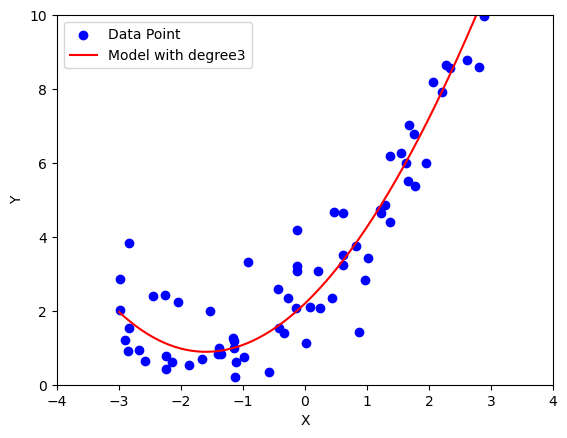

In [25]:
ploynomial_regression(3)

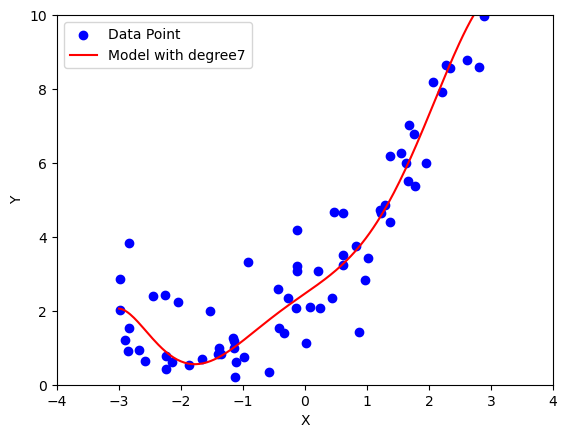

In [26]:
ploynomial_regression(7)

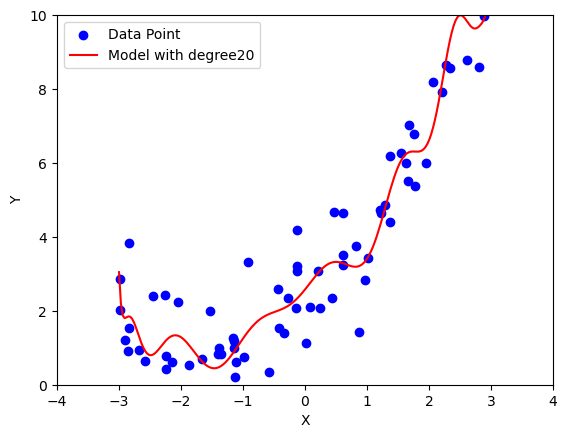

In [27]:
ploynomial_regression(20)